In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os.path
DATA_DIR = os.path.join('..','data')

In [2]:
#!pip install plotnine
from plotnine import *

In [3]:
Data=pd.read_csv(os.path.join(DATA_DIR,'All_Extracted_Data_From_PDFs.csv'))
Data=Data.astype({'Year':'int'})
print(Data.shape)

(3039, 9)


In [4]:
Data['Total_Topic_Year']=Data.groupby(['Year','Topic'])['Amount_in_usd'].transform(sum)
Data['Total_Year']=Data.groupby('Year')['Amount_in_usd'].transform(sum)

In [5]:
Aggregated=Data[['Year','Topic','Amount_in_usd']].groupby(['Year','Topic']).sum('Amount_in_usd').reset_index().rename({'Amount_in_usd':'Total_Topic'},axis=1)

In [6]:
Aggregated['Total_Year']=Aggregated.reset_index().groupby('Year')['Total_Topic'].transform(sum)

In [7]:
Aggregated['Percentage']=Aggregated['Total_Topic']/Aggregated['Total_Year']

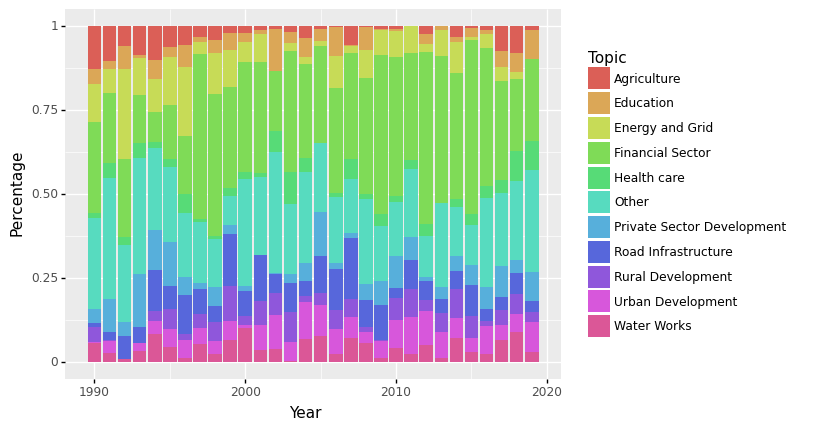

<ggplot: (8761262421309)>

In [8]:
ggplot(Aggregated)+geom_bar(aes(x='Year', y='Percentage', fill='Topic'),stat='identity')

# Import Indicators
## Private Sector Development

We use GDP per capita for this Topic. 

In [9]:
#Import the Indicators
#GDP
GDP=pd.read_csv(os.path.join(DATA_DIR,'gdp_historical_data.csv'),skiprows=4)
GDP.drop('Unnamed: 65',axis=1,inplace=True)
GDP=GDP.melt(id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'],var_name='Year',value_name='GDP')
GDP=GDP[['Country Code','Year','GDP']].rename({'Country Code':'Country_Code'},axis=1)
GDP=GDP.astype({'Year':'int','GDP':'float'})

#Population
Population=pd.read_csv(os.path.join(DATA_DIR,'population_historical_data.csv'),skiprows=4)
Population.drop('Unnamed: 65',axis=1,inplace=True)
Population=Population.melt(id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'],var_name='Year',value_name='Population')
Population=Population[['Country Code','Year','Population']].rename({'Country Code':'Country_Code'},axis=1)
Population=Population.astype({'Year':'int','Population':'float'})

GDP_pc=GDP.merge(Population,how='left',on=['Country_Code','Year'])
GDP_pc['Indicator_Value']=GDP_pc['GDP']/GDP_pc['Population']

#We interpolate the missing data using a line. 
GDP_pc=GDP_pc.sort_values('Year').groupby('Country_Code').apply(lambda group: group.interpolate(limit_direction='both'))

GDP_pc['Indicator_Name']='GDP per capita'
GDP_pc['Topic']='Private Sector Development'
GDP_pc=GDP_pc[['Country_Code','Year','Indicator_Name','Indicator_Value','Topic']]
#GDP_pc

## Health
We use Mortality Rate for infants per 1000 live at birth.

In [10]:
#Mortality Rates
Mortality=pd.read_csv(os.path.join(DATA_DIR,'Mortality rate of infant per 1000 live birth.csv'),skiprows=4)
Mortality.drop('Unnamed: 65',axis=1,inplace=True)
Mortality=Mortality.melt(id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'],var_name='Year',value_name='Indicator_Value')
Mortality=Mortality[['Country Code','Year','Indicator Name','Indicator_Value']].rename({'Country Code':'Country_Code','Indicator Name':'Indicator_Name'},axis=1)
Mortality=Mortality.astype({'Year':'int','Indicator_Value':'float'})

#We interpolate the missing data using a line. 
Mortality=Mortality.sort_values('Year').groupby('Country_Code').apply(lambda group: group.interpolate(limit_direction='both'))
Mortality['Topic']='Health care'
#Mortality

## Education

We use Literacy rate for people 15 years old and older. 

In [11]:
#Literacy rate
Literacy=pd.read_csv(os.path.join(DATA_DIR,'Literacy rate 15 and older.csv'),skiprows=4)
Literacy.drop('Unnamed: 65',axis=1,inplace=True)
Literacy=Literacy.melt(id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'],var_name='Year',value_name='Indicator_Value')
Literacy=Literacy[['Country Code','Year','Indicator Name','Indicator_Value']].rename({'Country Code':'Country_Code','Indicator Name':'Indicator_Name'},axis=1)
Literacy=Literacy.astype({'Year':'int','Indicator_Value':'float'})

#We interpolate the missing data using a line. 
Literacy=Literacy.sort_values('Year').groupby('Country_Code').apply(lambda group: group.interpolate(limit_direction='both'))
Literacy['Topic']='Education'

# Energy and Grid
We use access to electricity per population. 

In [12]:
#Energy rate
Energy=pd.read_csv(os.path.join(DATA_DIR,'world_bank_access_to_electricity_per_pop.csv'),skiprows=0)
Energy=Energy.melt(id_vars=['Country Name','Country Code','Indicator Name'],var_name='Year',value_name='Indicator_Value')
Energy=Energy[['Country Code','Year','Indicator Name','Indicator_Value']].rename({'Country Code':'Country_Code','Indicator Name':'Indicator_Name'},axis=1)
Energy=Energy.astype({'Year':'int','Indicator_Value':'float'})
Energy.Indicator_Value.isnull().sum()

#We interpolate the missing data using a line. 
Energy=Energy.sort_values('Year').groupby('Country_Code').apply(lambda group: group.interpolate(limit_direction='both'))
Energy['Topic']='Energy and Grid'

In [13]:
#Put all frames together.
Indicators=pd.concat([GDP_pc,Mortality,Literacy,Energy],axis=0)

In [14]:
Indicators.Indicator_Name.value_counts()

GDP per capita                                                16104
Mortality rate, infant (per 1,000 live births)                16104
Literacy rate, adult total (% of people ages 15 and above)    16104
Access to electricity (% of population)                        8184
Name: Indicator_Name, dtype: int64

In [15]:
Indicators.sample(10)

,Country_Code,Year,Indicator_Name,Indicator_Value,Topic
3229,EAS,2002,Access to electricity (% of population),93.114595,Energy and Grid
2022,NLD,1967,"Mortality rate, infant (per 1,000 live births)",13.800000,Health care
2519,LVA,1969,"Literacy rate, adult total (% of people ages 1...",99.452301,Education
11001,NRU,2001,"Mortality rate, infant (per 1,000 live births)",32.800000,Health care
15722,MAR,2019,"Mortality rate, infant (per 1,000 live births)",18.300000,Health care
11943,ECS,2005,"Literacy rate, adult total (% of people ages 1...",96.924469,Education
6369,CAN,1984,"Mortality rate, infant (per 1,000 live births)",8.300000,Health care
7372,TZA,1987,"Literacy rate, adult total (% of people ages 1...",59.113800,Education
3282,ITA,1972,"Literacy rate, adult total (% of people ages 1...",96.460541,Education
7140,AUT,1987,GDP per capita,16392.769523,Private Sector Development


In [16]:
#Merge Indicators with Loans Data
Data_All=Data.merge(Indicators.dropna(),how='outer',on=['Country_Code','Year','Topic'])
Data=Data.merge(Indicators,how='left',on=['Country_Code','Year','Topic'])

# Indicators Delta
We want to compare how much each indicator changes with how much money each country has received in loans for each specific topic. To do this, we do the following:
For each country, identify all loans in each topic, the earliest loan and the latest loan of that topic.
We compute an indicator delta as the value 5 years after the latest loan, minus the indicator the year of the earlieast loan. 
Finally, we compute the impact by dividing the indicator delta/ loan amount (in millions). 

Thus the Loan_Impact represents the impact of a million dollars loan up to five years later on the corresponding indicator. 

In [17]:
num_years_after=5
#Compute Delta for each country
Indicators_Delta=Data.sort_values('Year').groupby(['Country','Country_Code','Topic','Indicator_Name'])\
                        .aggregate(Start_Indicator=('Indicator_Value',lambda x: x.to_list()[0]),
                                   Total_Amount=('Amount_in_usd',sum),
                                   Start_Year=('Year',min), Last_Year=('Year',lambda x: min(max(x)+5,2019)),
                                   Number_Loans=('Year','count'))\
                        .reset_index()
Indicators_Delta=Indicators_Delta.merge(Indicators.rename({'Year':'Last_Year','Indicator_Value':'Last_Indicator'},axis=1),how='left')
Indicators_Delta['Delta_Indicator']=Indicators_Delta['Last_Indicator']-Indicators_Delta['Start_Indicator']

Indicators_Delta['Loan_Impact']=Indicators_Delta['Delta_Indicator']/(Indicators_Delta['Total_Amount']/1e6)


In [18]:
#These are the top 5 countries with biggest impact per topic
Indicators_Delta[Indicators_Delta.Topic!='Health care'].sort_values('Loan_Impact',ascending=False)\
                                                        .groupby('Topic').apply(lambda x: x[0:5])[['Country','Indicator_Name',
                                                                                                   'Start_Year','Last_Year','Total_Amount',
                                                                                                  'Delta_Indicator','Loan_Impact']]


Country  \
Topic                                                 
Education                  20                Belize   
                           73                 India   
                           84               Jamaica   
                           1                Algeria   
                           111            Mauritius   
Energy and Grid            21                Belize   
                           85               Jamaica   
                           123              Nigeria   
                           55           El Salvador   
                           44              Dominica   
Private Sector Development 161      Slovak Republic   
                           65               Grenada   
                           100               Latvia   
                           112            Mauritius   
                           6    Antigua and Barbuda   

                                                                   Indicator_Name  \
Topic                                                                               
Education                  20   Literacy rate, adult total (% of people ages 1...   
                           73   Literacy rate, adult total (% of people ages 1...   
                           84   Literacy rate, adult total (% of people ages 1...   
                           1    Literacy rate, adult total (% of people ages 1...   
                           111  Literacy rate, adult total (% of people ages 1...   
Energy and Grid            21             Access to electricity (% of population)   
                           85             Access to electricity (% of population)   
                           123            Access to electricity (% of population)   
                           55             Access to electricity (% of population)   
                           44             Access to electricity (% of population)   
Private Sector Development 161                                     GDP per capita   
                           65                                      GDP per capita   
                           100                                     GDP per capita   
                           112                                     GDP per capita   
                           6                                       GDP per capita   

                                Start_Year  Last_Year  Total_Amount  \
Topic                                                                 
Education                  20         1992       1997  7.100000e+06   
                           73         1990       2019  1.940000e+08   
                           84         2008       2019  2.700000e+07   
                           1          1991       1999  1.560000e+08   
                           111        1993       2000  5.200000e+07   
Energy and Grid            21         1994       1999  1.150000e+07   
                           85         1995       2016  3.600000e+07   
                           123        1990       1995  7.000000e+07   
                           55         1995       2000  6.500000e+07   
                           44         2004       2019  1.273000e+08   
Private Sector Development 161        2003       2008  5.655801e+06   
                           65         2015       2019  3.800000e+06   
                           100        1994       2007  4.203000e+07   
                           112        2000       2014  2.456000e+07   
                           6          2018       2019  2.000000e+06   

                                Delta_Indicator  Loan_Impact  
Topic                                                         
Education                  20          3.669196     0.516788  
                           73         26.896772     0.138643  
                           84          3.271951     0.121183  
                           1          10.796063     0.069206  
                           111         3.104103     0.059694  
Energy and Gr

In [19]:
Indicators_Delta[Indicators_Delta.Topic=='Health care'].sort_values('Loan_Impact')\
                                                        .groupby('Topic').apply(lambda x: x[0:5])[['Country','Indicator_Name',
                                                                                                   'Start_Year','Last_Year','Total_Amount',
                                                                                                  'Delta_Indicator','Loan_Impact']]

Country  \
Topic                              
Health care 187       Uzbekistan   
            127  North Macedonia   
            3            Algeria   
            184          Uruguay   
            140             Peru   

                                                 Indicator_Name  Start_Year  \
Topic                                                                         
Health care 187  Mortality rate, infant (per 1,000 live births)        1998   
            127  Mortality rate, infant (per 1,000 live births)        2004   
            3    Mortality rate, infant (per 1,000 live births)        1991   
            184  Mortality rate, infant (per 1,000 live births)        1995   
            140  Mortality rate, infant (per 1,000 live births)        1994   

                 Last_Year  Total_Amount  Delta_Indicator  Loan_Impact  
Topic                                                                   
Health care 187       2003    30000000.0            -10.0    -0.333333  
            127       2009    10000000.0             -3.0    -0.300000  
            3         1996    16000000.0             -4.4    -0.275000  
            184       2012    40900900.0             -9.3    -0.227379  
            140       2019   174000000.0            -35.4    -0.203448

# Arima Model and p-values
Many countries have received multiple loans over the years, and we wonder if it has had an impact on these indicators. 
To measure this, for each country and topic, we autmoatically fit an ARIM model with the loans as an exogenous variable. Since it can be that the impact of the loan is visible years after the loan, we check for an impact within the first 5 years after each loan. Our null hypothesis is that the loans don't affect the indicators, so when the p-value is less than 0.1, there is a 90% probability that the loans have actually made an impact for that country and topic. 

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

def create_offset(lista,offset):
    lista=lista.to_list()
    size=len(lista)
    lista=[0]*offset+lista
    lista=lista[0:size]
    return lista

In [22]:
p_treshold=0.1
offsets=[]
country_codes=[]
topics=[]
p_values=[]
for offset in range(6):
    for topic in ['Education','Health care','Private Sector Development','Energy and Grid']:
        for country_code in Data.Country_Code.unique():
            X=Data_All[(Data_All.Topic==topic) & (Data_All.Country_Code==country_code)][['Year','Amount_in_usd','Indicator_Value']]
            X=X[(X.Year>=1990) & (X.Year<=2019)].sort_values('Year').reset_index(drop=True)
            X=X.groupby('Year').aggregate({'Amount_in_usd':sum, 'Indicator_Value':'mean'})       
            X=X.dropna()

            if X.shape[0]>5 and X.Amount_in_usd.sum()>0:
                X=X.reset_index()
                X['Amount_in_usd']=create_offset(X['Amount_in_usd'],offset)     
                X[['Indicator_Value']]=minmax.fit_transform(X[['Indicator_Value']])
                X[['Amount_in_usd']]=minmax.fit_transform(X[['Amount_in_usd']])  

                tsm=ARIMA(X['Indicator_Value'],X['Amount_in_usd'])
                Results=tsm.fit()
                pvalue=Results.pvalues['Amount_in_usd']
                if pvalue<p_treshold:
                    offsets.append(offset)
                    country_codes.append(country_code)
                    topics.append(topic)
                    p_values.append(pvalue)
                    print(topic, country_code,' P-value: ',pvalue, ' Offset: ', offset)               

Education COL  P-value:  0.011394338740265497  Offset:  0
Health care ARG  P-value:  0.058452292693635  Offset:  0
Private Sector Development TUR  P-value:  0.035539491364203875  Offset:  0
Energy and Grid IDN  P-value:  0.0948981406024938  Offset:  0
Energy and Grid CHN  P-value:  0.0016181365243013893  Offset:  0
Education IDN  P-value:  0.09178859062436748  Offset:  1
Education COL  P-value:  0.00656297712694116  Offset:  1
Health care ARG  P-value:  0.015639497328983246  Offset:  1
Private Sector Development TUR  P-value:  0.029274879300870027  Offset:  1
Energy and Grid CHN  P-value:  0.002690086577383899  Offset:  1
Education COL  P-value:  0.05530980785604925  Offset:  2
Health care ARG  P-value:  0.042622610615432245  Offset:  2
Private Sector Development TUR  P-value:  0.023018290142871406  Offset:  2
Private Sector Development EGY  P-value:  0.09174414006163586  Offset:  2
Private Sector Development UKR  P-value:  0.028468241781217207  Offset:  2
Energy and Grid CHN  P-value:

In [23]:
#We put together this information in a table
Impact_TM=pd.DataFrame({'Topic':topics, 'Country_Code':country_codes, 'Years_Later':offsets, 'P_value':p_values})
Impact_TM.sort_values(['Topic','Country_Code'])
Impact_TM=Impact_TM.sort_values('P_value').groupby(['Topic','Country_Code']).first().reset_index()
Impact_TM

,Topic,Country_Code,Years_Later,P_value
0,Education,COL,1,0.006563
1,Education,IDN,1,0.091789
2,Energy and Grid,CHN,0,0.001618
3,Energy and Grid,IDN,0,0.094898
4,Energy and Grid,TUR,5,0.015630
5,Health care,ARG,3,0.010667
6,Private Sector Development,EGY,2,0.091744
7,Private Sector Development,TUR,4,0.010347
8,Private Sector Development,UKR,2,0.028468


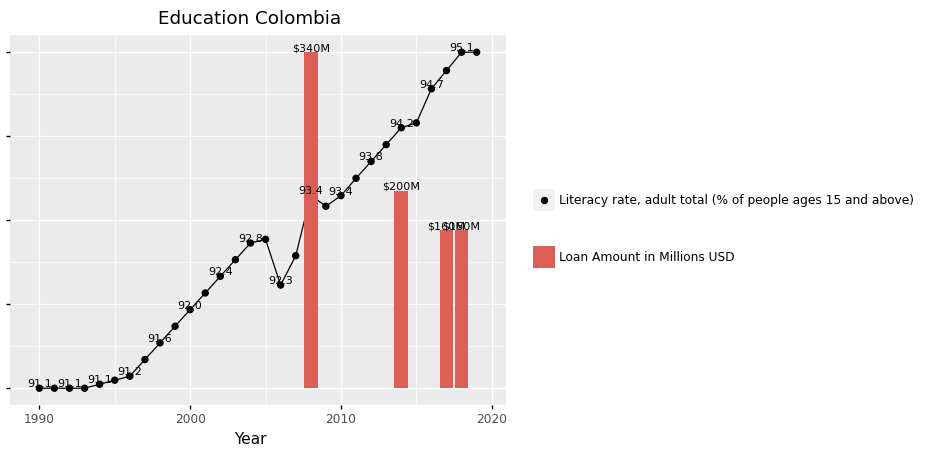

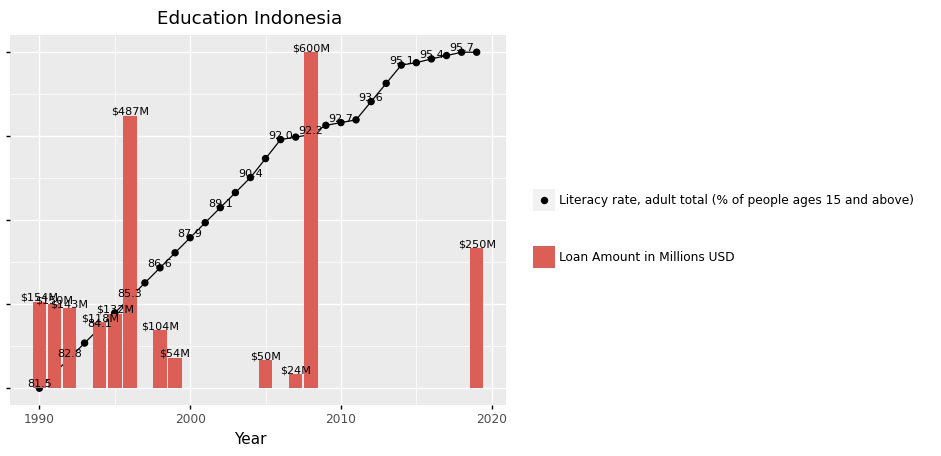

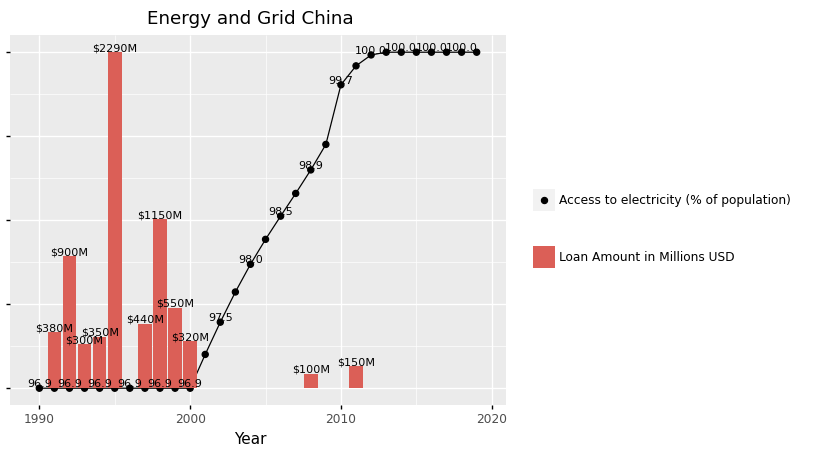

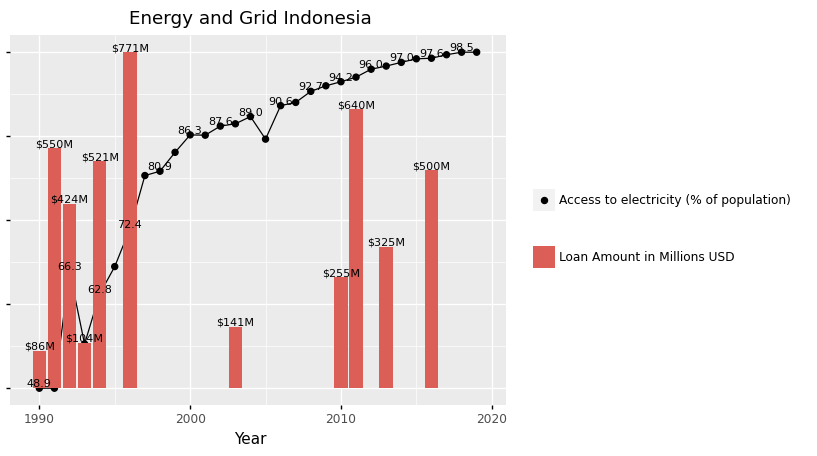

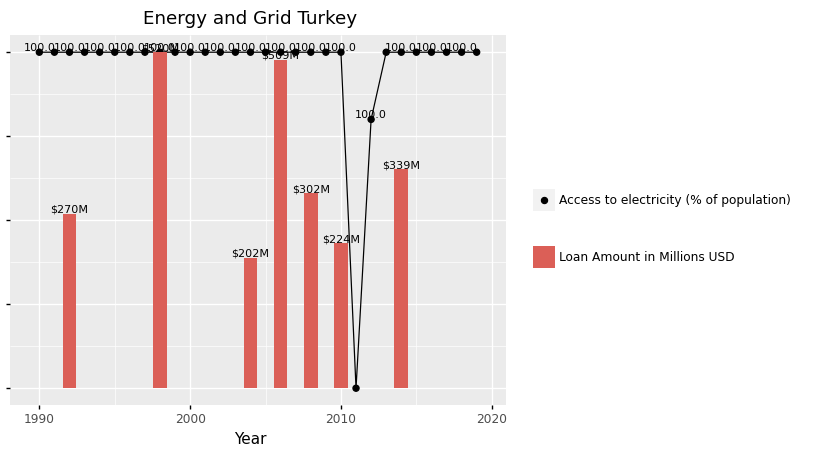

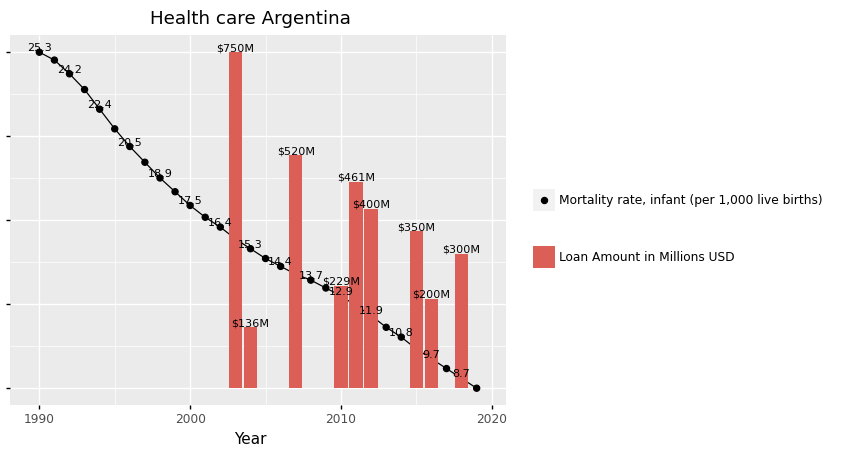

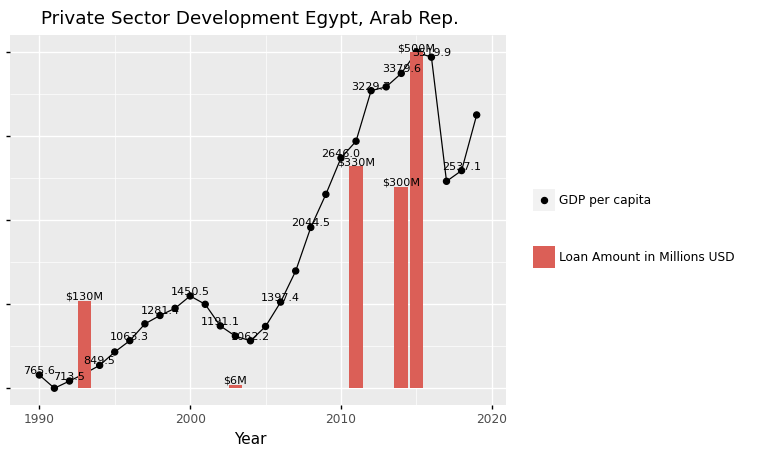

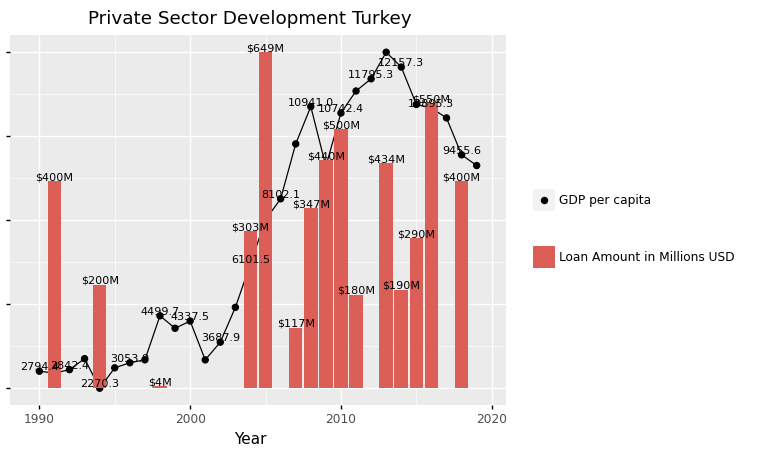

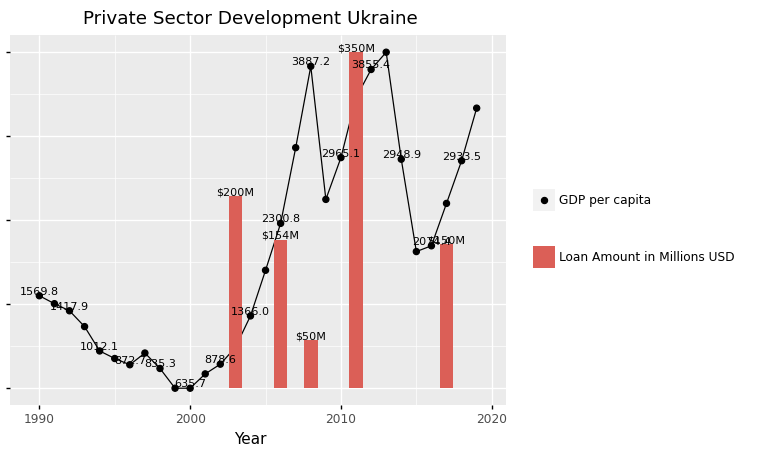

In [24]:
#And now we create some plots
for ind in Impact_TM.index:
    country_code=Impact_TM.Country_Code[ind]
    topic=Impact_TM.Topic[ind]

    X=Data_All[(Data_All.Topic==topic) & (Data_All.Country_Code==country_code)][['Year','Amount_in_usd','Indicator_Value']]
    X=X[(X.Year>=1990) & (X.Year<=2019)].sort_values('Year').reset_index(drop=True)
    X=X.groupby(['Year']).aggregate({'Amount_in_usd':sum, 'Indicator_Value':'mean'})       
    X=X.reset_index()  

    X[['Indicator_Value_minmax']]=minmax.fit_transform(X[['Indicator_Value']])
    X[['Amount_in_usd_minmax']]=minmax.fit_transform(X[['Amount_in_usd']])  
    X['Amount_in_usd']=X['Amount_in_usd']/1e6
    X['Bars']='Loan Amount in Millions USD'
    indicator_name=Data[(Data.Country_Code==country_code) &(Data.Topic==topic)].Indicator_Name.iloc[0]
    X['Points']=indicator_name
    country=Data[(Data.Country_Code==country_code) & -(Data.Country.isnull())].Country.iloc[0]


    g=ggplot(X)+geom_point(aes(x='Year',y='Indicator_Value_minmax',size='Points'))\
    +geom_line(aes(x='Year',y='Indicator_Value_minmax',group=1))\
    +geom_bar(aes(x='Year',y='Amount_in_usd_minmax',fill='Bars'),stat='identity')+theme(axis_text_y=element_blank())\
    + labs(title=topic+' '+country,y='',fill="",size='')\
    +geom_text(X[X.index%2==0],aes(x='Year',y='Indicator_Value_minmax',label='Indicator_Value'),
             size=8,va='bottom',format_string='{:.1f}')\
    +geom_text(X[X.Amount_in_usd>0],aes(x='Year',y='Amount_in_usd_minmax',label='Amount_in_usd'),
                 size=8, va='bottom', format_string='${:.0f}M')
    g.draw() 


In [25]:
#We save the dataframe Indicators_Delta
Indicators_Delta.to_csv(os.path.join(DATA_DIR,'Indicators_Delta.csv'),index=False)